## Check selected labs usage across all sites

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [13]:
selected_labs_dict = {'Glucose [Mass/volume] in Serum or Plasma':'glucose_in_serum',
        'Creatinine [Mass/volume] in Serum or Plasma':'creatinine_in_serum',
        'Prothrombin time (PT)':'prothrombin_time',
        ' Eosinophils [#/volume] in Blood':'eosinophils',
        ' Lymphocytes [#/volume] in Blood':'lymphocytes',
        ' Basophils [#/volume] in Blood':'basophils',
        'Sodium [Moles/volume] in Serum or Plasma':'sodium_in_serum',
        'Potassium [Moles/volume] in Serum or Plasma':'potassium_in_serum',
        ' Hematocrit [Volume Fraction] of Blood':'hematocrit',
        ' Hemoglobin [Mass/volume] in Blood':'hemoglobin',
        'Erythrocytes [#/volume] in Blood by Automated count':'erithrocytes',
        ' Monocytes [#/volume] in Blood':'monocytes',
        ' Neutrophils [#/volume] in Blood':'neutrophils',
        'Platelets [#/volume] in Blood by Automated count':'platelets',
#         ' Urea nitrogen [Mass/volume] in Blood':'blood_urea_nitrogen',
#         ' Fibrinogen [Mass/volume] in Platelet poor plasma by Coagulation assay':'fibrinogen',
        'Bilirubin.total [Mass/volume] in Serum or Plasma':'bilirubin_in_serum',
        'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma':'alanine_aminotransferase',
        'Gamma glutamyl transferase [Enzymatic activity/volume] in Serum or Plasma':'gamma_glutamyl_transferase',
        'pH of Urine by Test strip':'ph_in_urine',
        'Albumin [Mass/volume] in Serum or Plasma':'albumin_in_serum',
        'Calcium [Mass/volume] in Serum or Plasma':'calcium_in_serum',
        ' pH of Venous blood':'ph_venous_blood',
        'Bicarbonate [Moles/volume] in Venous blood':'bicarbonate_venous_blood',
        ' Oxygen [Partial pressure] in Venous blood':'oxygen_venous_blood',
#         ' Carbon dioxide [Partial pressure] in Venous cord blood':'CO2_venous_blood',
        'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma':'aspartate_aminotransferase',
        ' Lactate dehydrogenase [Enzymatic activity/volume] in Serum or Plasma':'lactate_dehydrogenase',
        'Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma':'alkaline_phosphatase',
        ' Urate [Mass/volume] in Serum or Plasma':'urate_in_serum',
        'Triglyceride [Mass/volume] in Serum or Plasma':'triglyceride_in_serum',
        'Cholesterol [Mass/volume] in Serum or Plasma': 'cholestrol_in_serum',
        'Reticulocytes [#/volume] in Blood':'reticulocytes_in_blood'}

selected_labs_keys = [i.lstrip().rstrip() for i in selected_labs_dict.keys()]
selected_labs_dict = dict(zip(selected_labs_keys, selected_labs_dict.values()))


In [18]:
SITE_NAMES = ['HUF', 'HIL', 'HHE']

per_site_lab_counts = []
for SITE_NAME in SITE_NAMES:
    lab_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'LABS.txt')
    lookup_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'LOINC_LOOKUP.txt')

    # get the lab information
    df_labs = pd.read_csv(lab_csv_path, delimiter='|', quotechar=None, quoting=3)

    # get the loinc lookup file to get description of the lab test
    df_loinc = pd.read_csv(lookup_csv_path, delimiter='|')

    # remove duplicate loincs
    df_loinc.drop_duplicates(subset=['LOINC'], keep='last', inplace=True)

    # merge with labs csv to get lab descriptions based on LOINC
    df_labs = pd.merge(df_labs, df_loinc, on='LOINC', how='inner')

    df_labs.rename(columns = {'VALUE_x':'LAB_TEST_VALUE', 'DESCRIPTION':'LAB_TEST_NAME'}, inplace=True)

    # get counts of patients administered a lab
    lab_patient_counts_dict = dict.fromkeys( selected_labs_dict.values())
    for lab_name, lab_col_name in selected_labs_dict.items():
        lab_inds = df_labs.LAB_TEST_NAME.str.contains(lab_name, regex=False)
        df_lab = df_labs[lab_inds].rename(columns = {'LAB_TEST_VALUE':lab_col_name}).drop(labels=['LAB_TEST_NAME','UNIT'], axis=1)
        lab_patient_counts = len(df_lab.PATIENT_ID.unique())
        print('Lab %s conducted on %d patients at Site %s'%(lab_name, lab_patient_counts, SITE_NAME))
        lab_patient_counts_dict[lab_col_name] = lab_patient_counts
    per_site_lab_counts.append(lab_patient_counts_dict)
    
    del df_labs

Lab Glucose [Mass/volume] in Serum or Plasma conducted on 42654 patients at Site HUF
Lab Creatinine [Mass/volume] in Serum or Plasma conducted on 45401 patients at Site HUF
Lab Prothrombin time (PT) conducted on 37178 patients at Site HUF
Lab Eosinophils [#/volume] in Blood conducted on 48951 patients at Site HUF
Lab Lymphocytes [#/volume] in Blood conducted on 48951 patients at Site HUF
Lab Basophils [#/volume] in Blood conducted on 48951 patients at Site HUF
Lab Sodium [Moles/volume] in Serum or Plasma conducted on 44864 patients at Site HUF
Lab Potassium [Moles/volume] in Serum or Plasma conducted on 44844 patients at Site HUF
Lab Hematocrit [Volume Fraction] of Blood conducted on 48951 patients at Site HUF
Lab Hemoglobin [Mass/volume] in Blood conducted on 37515 patients at Site HUF
Lab Erythrocytes [#/volume] in Blood by Automated count conducted on 48951 patients at Site HUF
Lab Monocytes [#/volume] in Blood conducted on 48951 patients at Site HUF
Lab Neutrophils [#/volume] in Bl

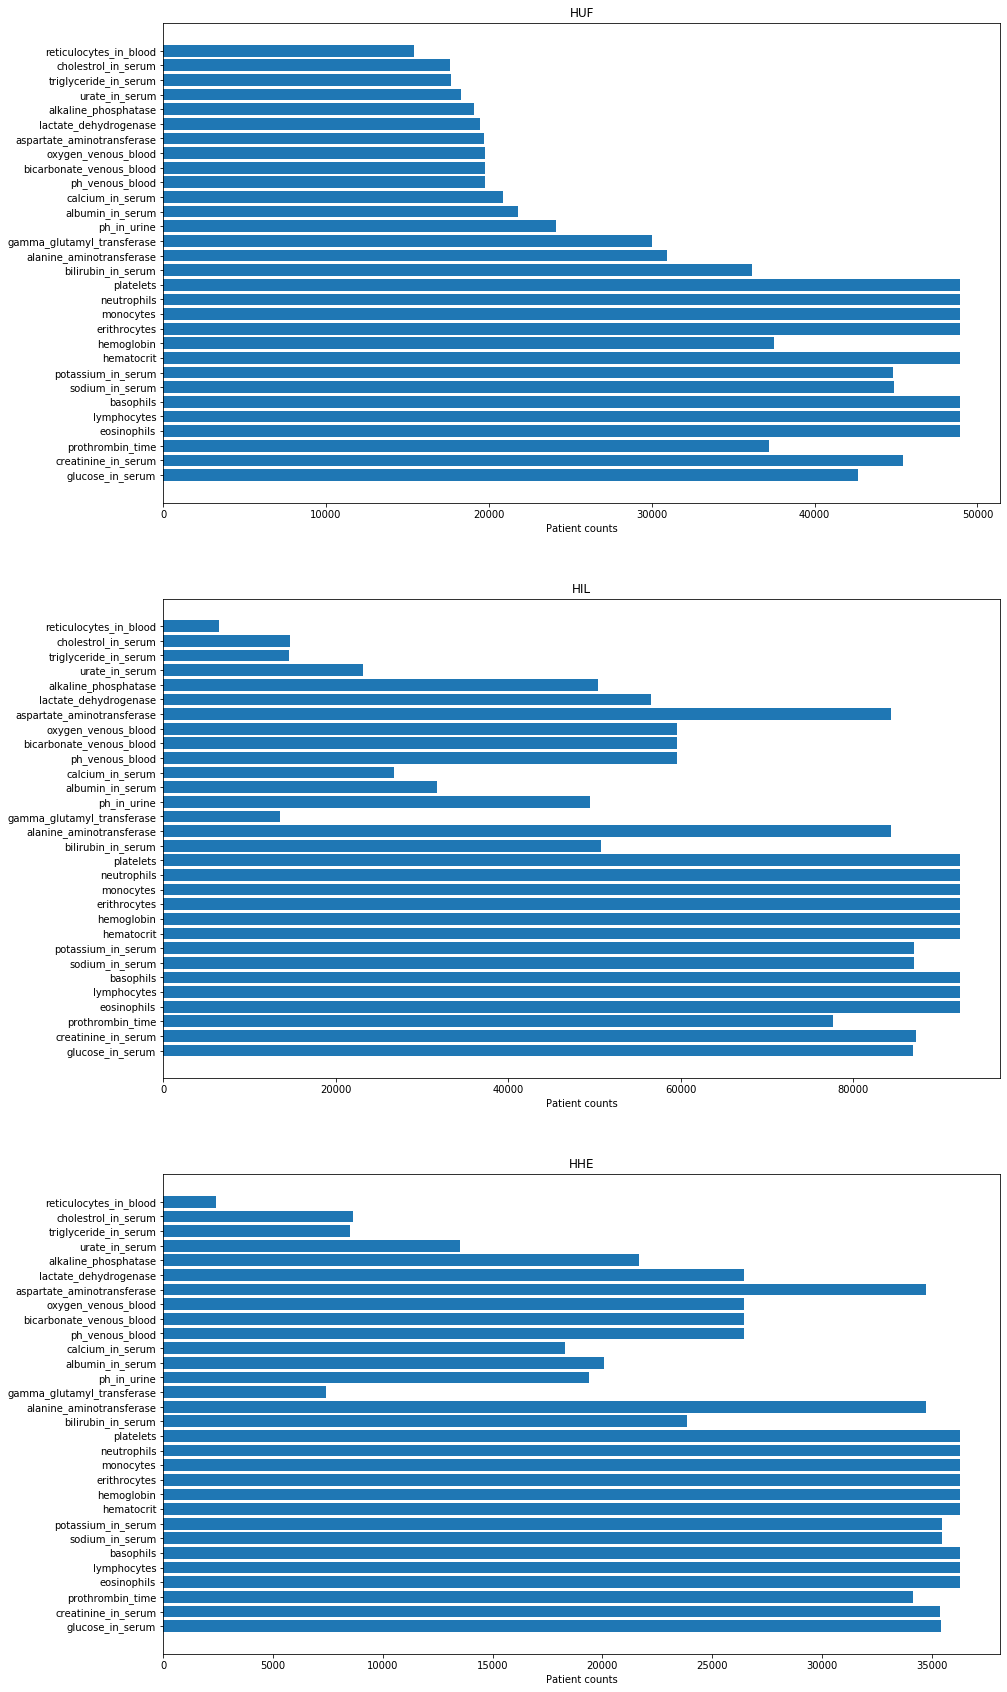

In [33]:
f, axs = plt.subplots(3,1,figsize=(15, 30))

for i in range(len(SITE_NAMES)):
    axs[i].barh(list(per_site_lab_counts[i].keys()), list(per_site_lab_counts[i].values()))
    axs[i].set_title(SITE_NAMES[i])
    axs[i].set_xlabel('Patient counts')
    f.savefig('labs_per_site_hist.png')
plt.show()

## Check if a certain lab is named as somethong else in the other site

In [42]:
SITE_NAME = 'HUF'

lab_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'LABS.txt')
lookup_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'LOINC_LOOKUP.txt')

# get the lab information
df_labs = pd.read_csv(lab_csv_path, delimiter='|', quotechar=None, quoting=3)

# get the loinc lookup file to get description of the lab test
df_loinc = pd.read_csv(lookup_csv_path, delimiter='|')

# remove duplicate loincs
df_loinc.drop_duplicates(subset=['LOINC'], keep='last', inplace=True)

# merge with labs csv to get lab descriptions based on LOINC
df_labs = pd.merge(df_labs, df_loinc, on='LOINC', how='inner')

df_labs.rename(columns = {'VALUE_x':'LAB_TEST_VALUE', 'DESCRIPTION':'LAB_TEST_NAME'}, inplace=True)

keep_inds = df_labs.LAB_TEST_NAME.str.contains('Urea', regex=False)

df_labs[keep_inds].LAB_TEST_NAME.unique()

## Get the common 2nd level medications across all sites

In [7]:
SITE_NAMES = ['HUF', 'HIL', 'HHE']

per_site_second_level_medications_list = []
for SITE_NAME in SITE_NAMES:
    print('Getting medication codes for site : %s'%SITE_NAME)
    medication_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'MEDICATION_ADMINISTRATION.txt')

    # get the medication administration information
    df_medications = pd.read_csv(medication_csv_path, delimiter='|') 

    # drop unwanted columns to save memory
    df_medications.drop(columns=['ORDER_ID', 'ORDER_MED_ID', 'PHAPRO_CD', 'VALUE', 'UNIT'], inplace=True)

    # get first level of medication codes
    df_medications.ATC_CD = df_medications.ATC_CD.astype(str)
    atc_first_levels = [i[0] for i in df_medications.ATC_CD] 
    df_medications['atc_first_levels'] = atc_first_levels
    del atc_first_levels

    # get the second level of medication codes
    atc_second_levels = [i[:3] for i in df_medications.ATC_CD]
    df_medications['atc_second_levels'] = atc_second_levels
    del atc_second_levels

    all_second_levels = list(df_medications['atc_second_levels'].unique())
    legal_second_levels = [i for i in all_second_levels if (i[0].isalpha() and len(i)==3 and i!='nan')]
    
    del df_medications
    
    per_site_second_level_medications_list.append(legal_second_levels)

Getting medication codes for site : HUF
Getting medication codes for site : HIL
Getting medication codes for site : HHE


In [10]:
len(per_site_second_level_medications_list[2])

77

In [16]:
medication_list = list(set(per_site_second_level_medications_list[0]) & set(per_site_second_level_medications_list[1]) 
     & set(per_site_second_level_medications_list[2]))
medication_list.sort()

medication_list = ['%s_second_level_medication'%i for i in medication_list]

In [18]:
# create a csv of the medication columns present across all sites to insert into the spec sheet
medication_cols_df = pd.DataFrame(columns=['Column_name'], data=medication_list)

In [20]:
medication_cols_df.to_csv('medication_cols.csv', index=False)

In [15]:
medication_list

['A01',
 'A02',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A09',
 'A10',
 'A11',
 'A12',
 'B01',
 'B02',
 'B03',
 'B05',
 'C01',
 'C02',
 'C03',
 'C04',
 'C05',
 'C07',
 'C08',
 'C09',
 'C10',
 'D06',
 'D07',
 'D08',
 'G01',
 'G02',
 'G04',
 'H01',
 'H02',
 'H03',
 'H04',
 'H05',
 'J01',
 'J02',
 'J04',
 'J05',
 'J06',
 'J07',
 'L01',
 'L02',
 'L03',
 'L04',
 'M01',
 'M03',
 'M04',
 'M05',
 'N01',
 'N02',
 'N03',
 'N04',
 'N05',
 'N06',
 'N07',
 'P01',
 'P02',
 'P03',
 'R01',
 'R03',
 'R05',
 'R06',
 'S01',
 'V03',
 'V04',
 'V06',
 'V07']